# Jupyter notebook sample

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score

.

In [ ]:
%%sql


In [3]:
df = pd.read_csv('data/Student_performance_data _.csv')
df


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


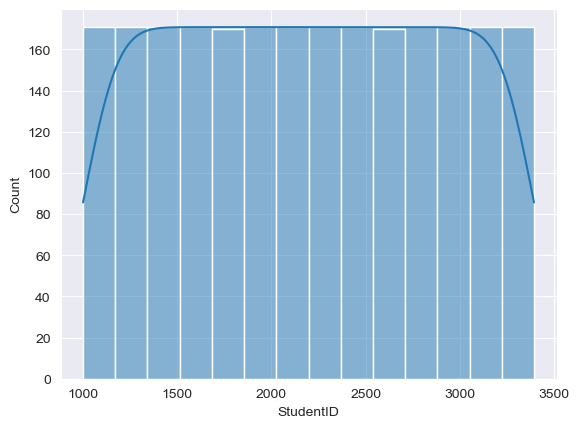

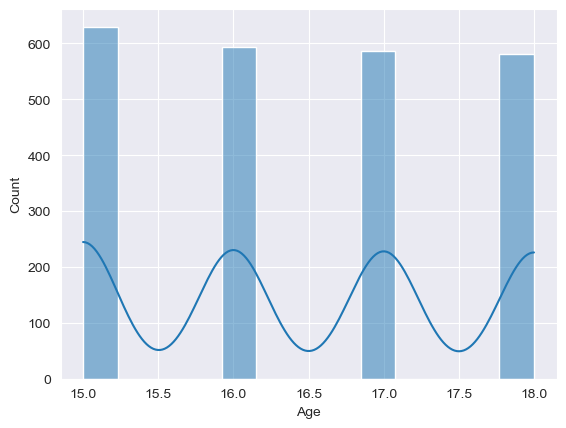

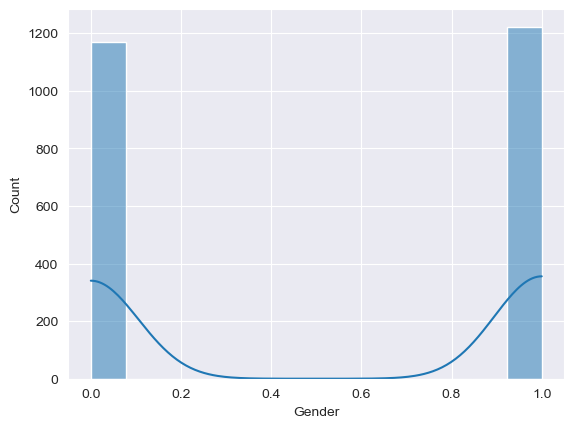

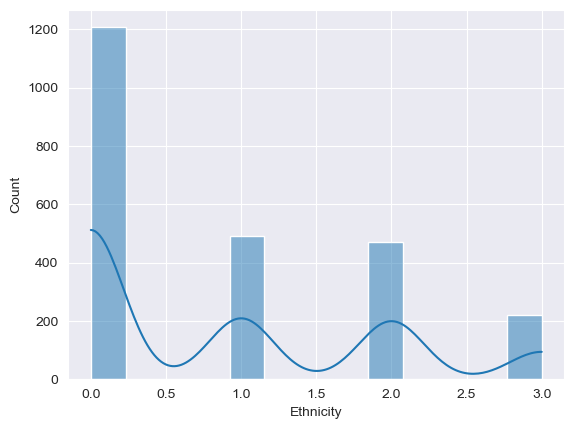

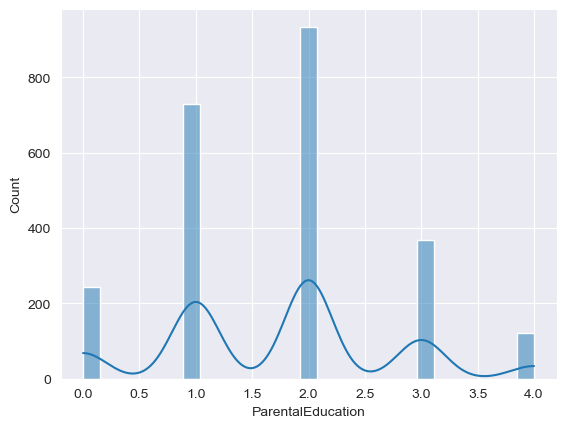

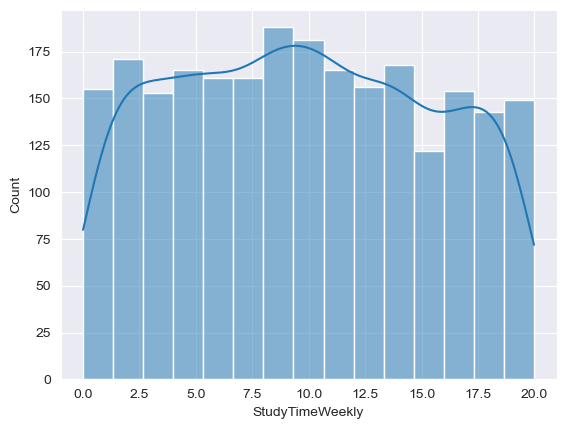

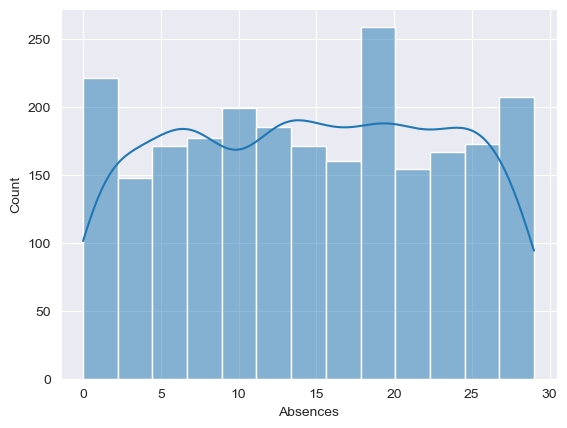

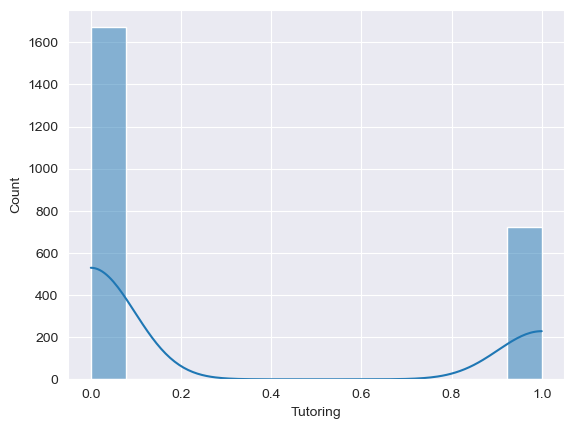

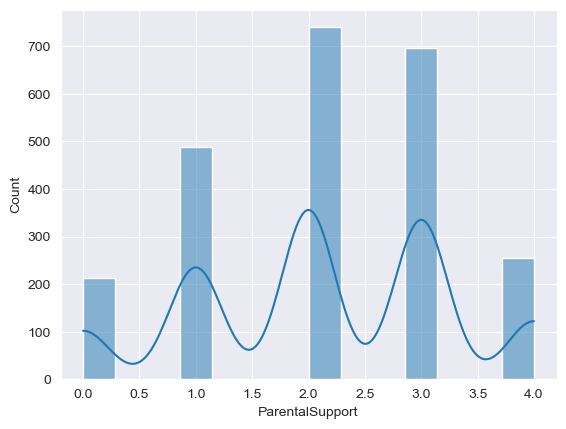

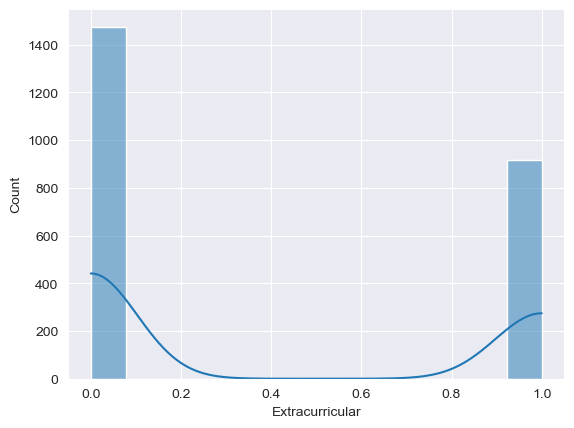

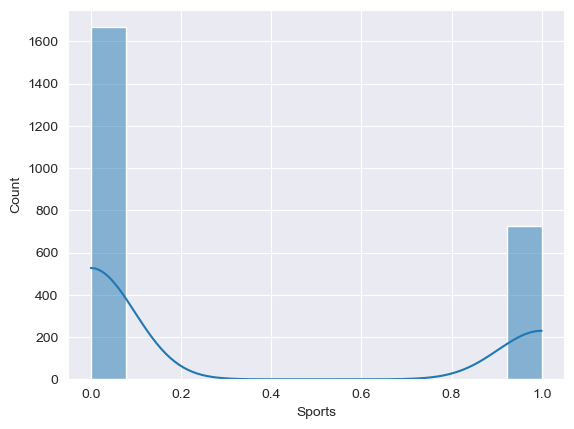

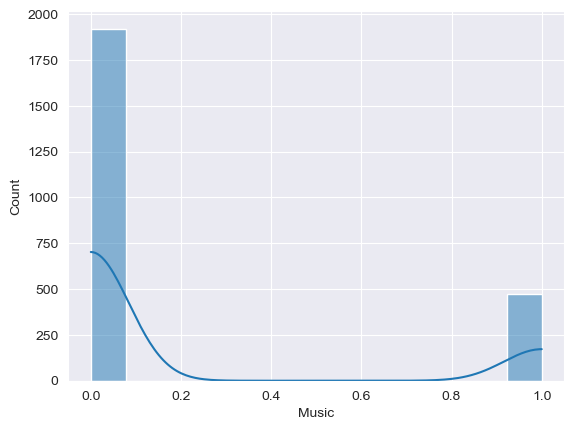

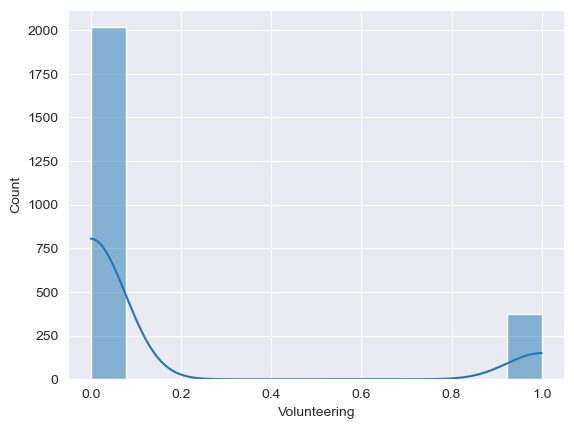

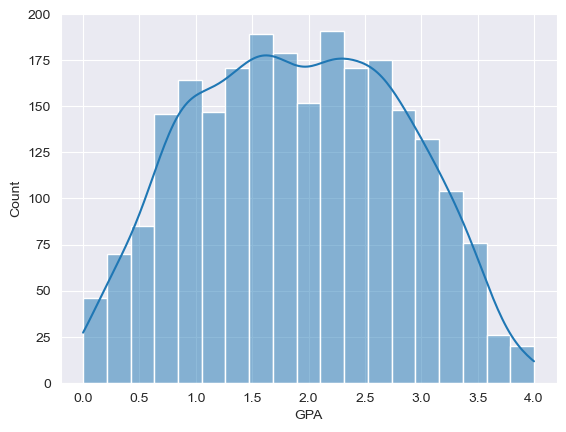

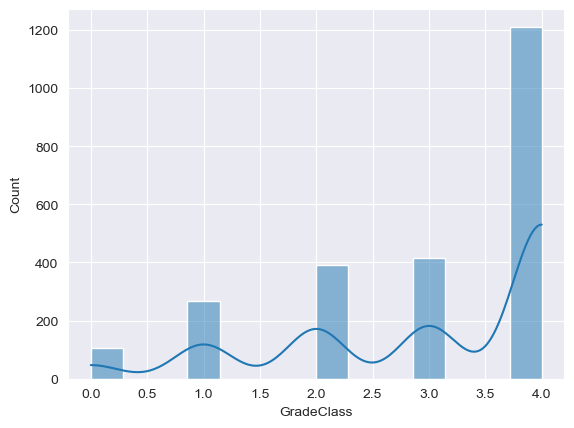

In [5]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()


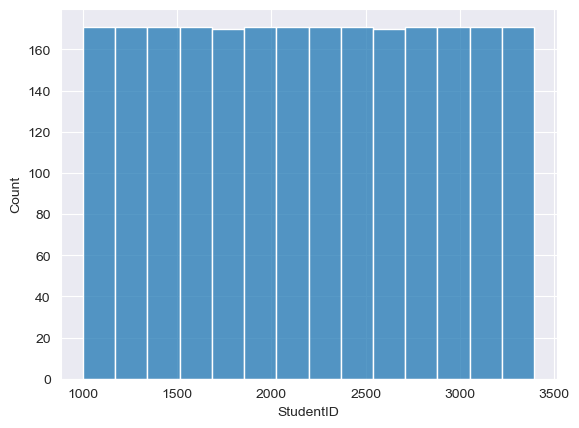

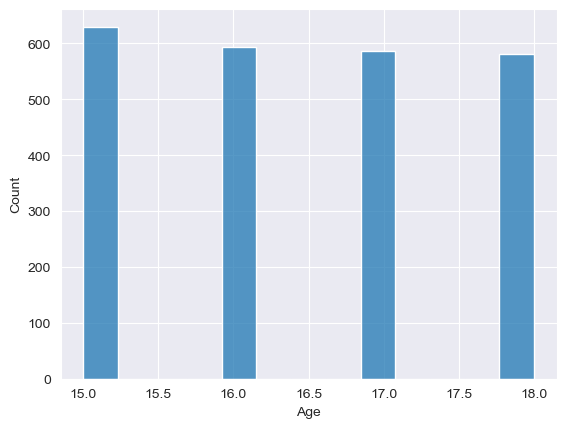

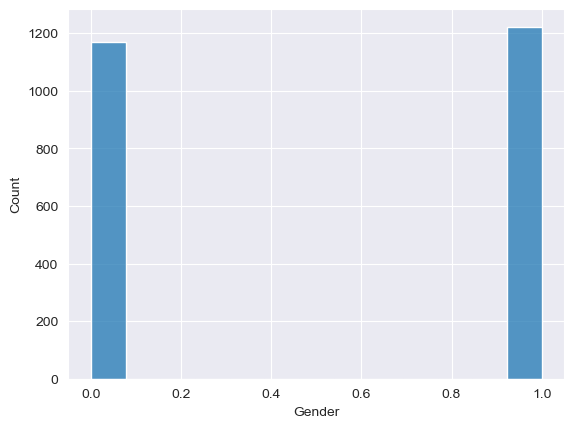

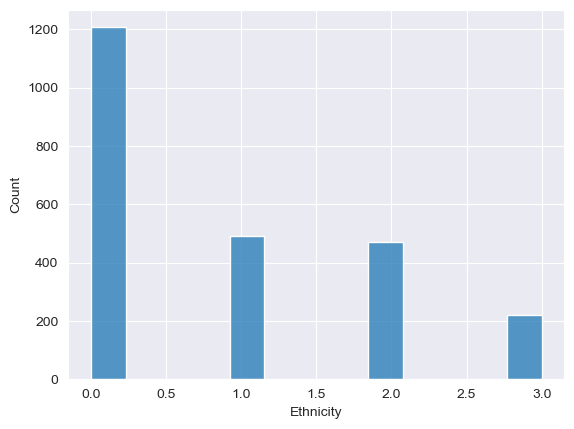

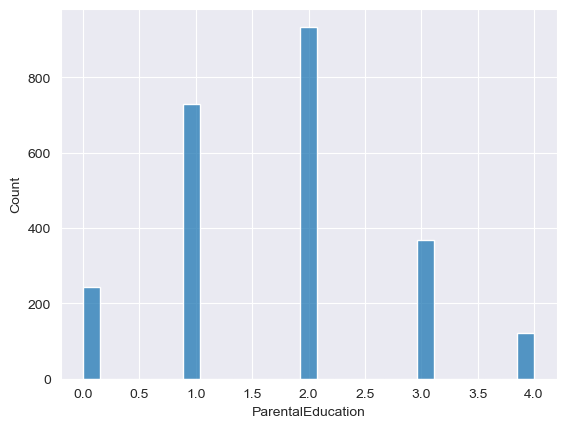

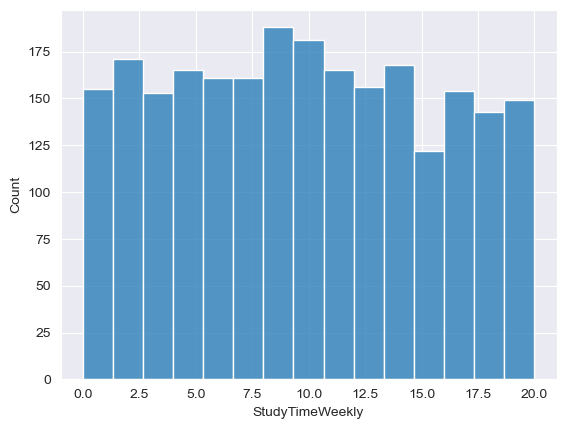

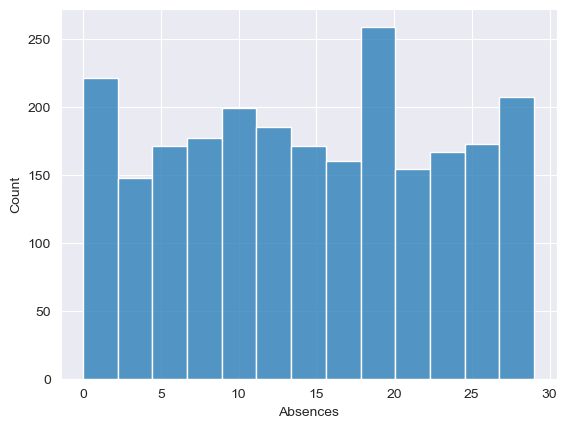

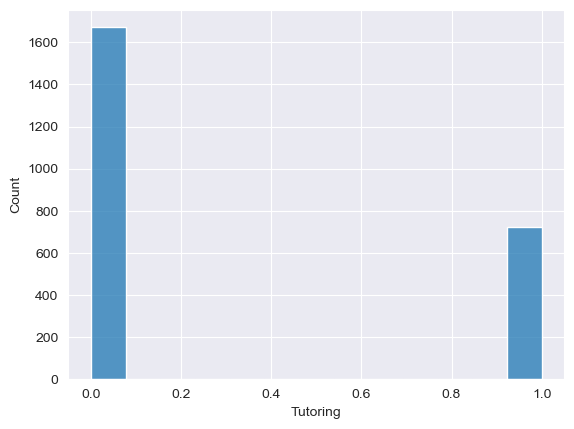

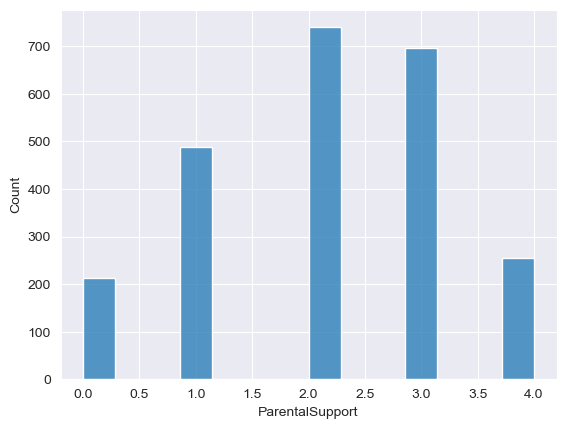

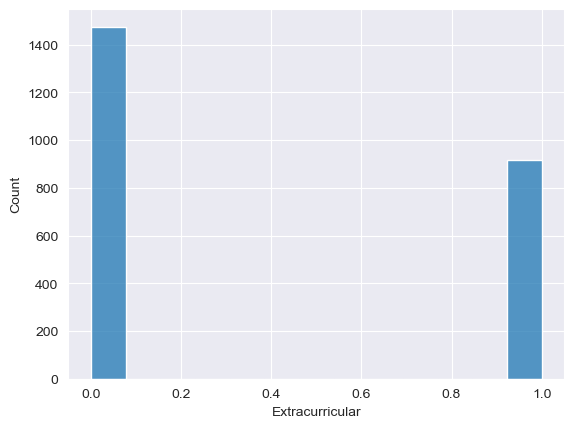

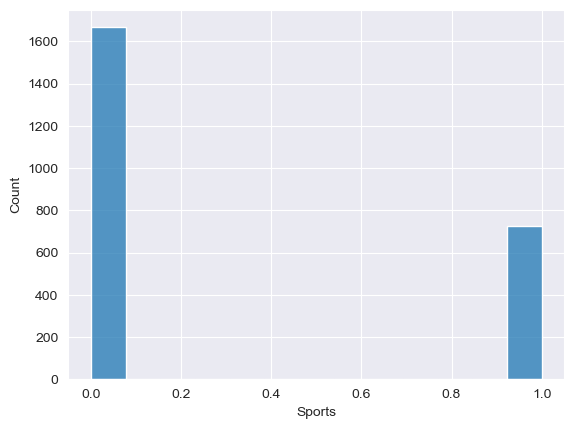

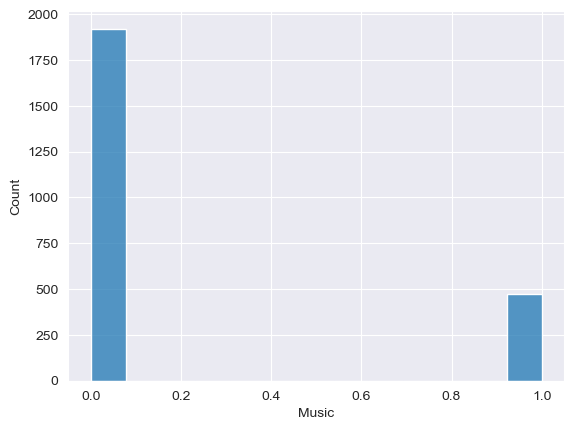

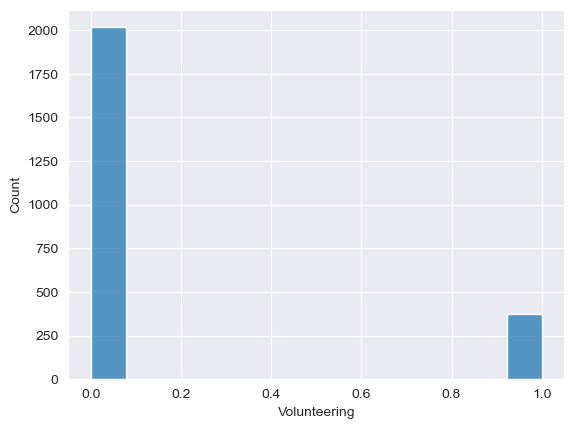

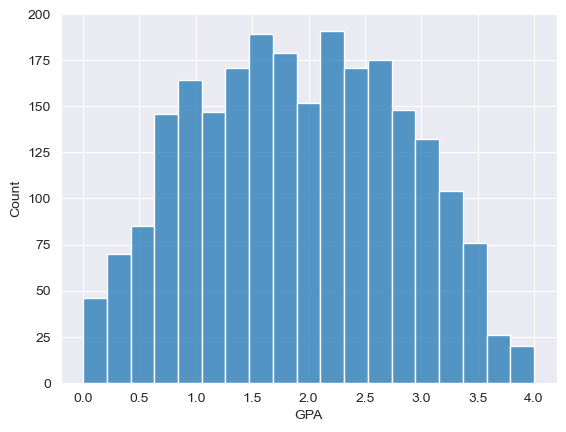

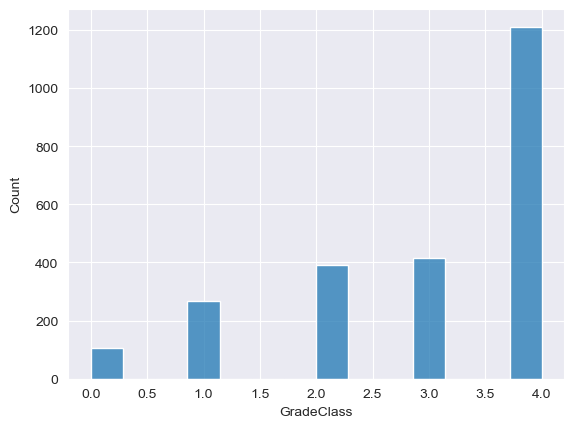

In [6]:
for col in df.columns:
    sns.histplot(data= df, x=col)
    plt.show()

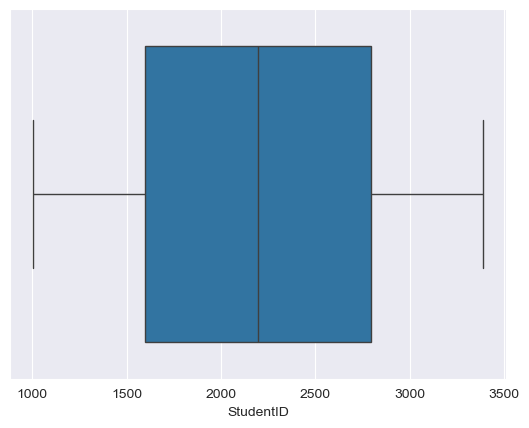

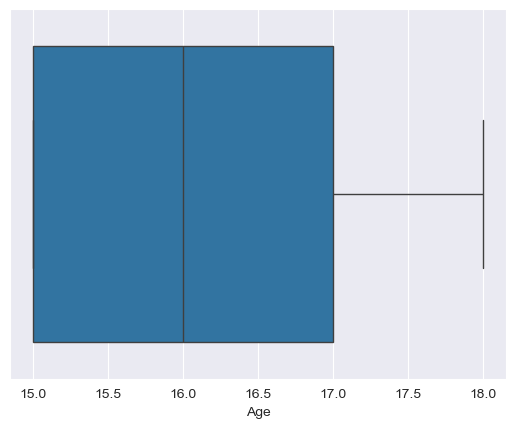

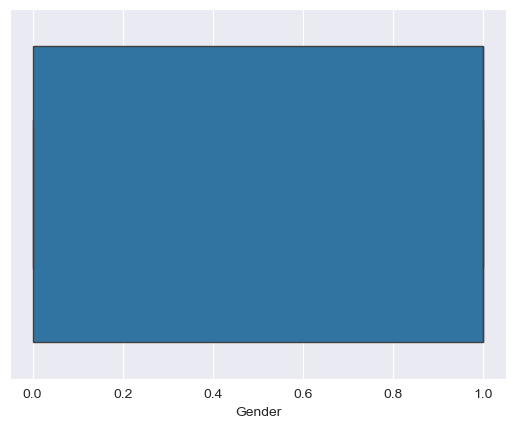

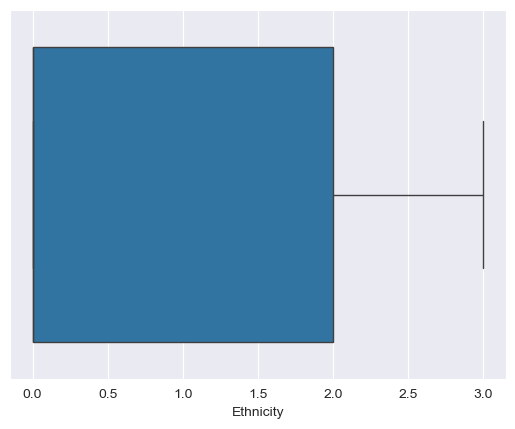

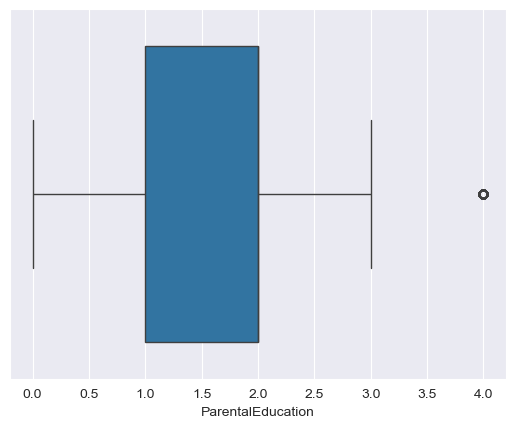

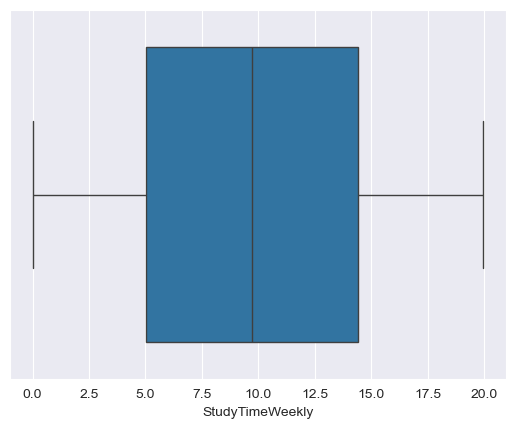

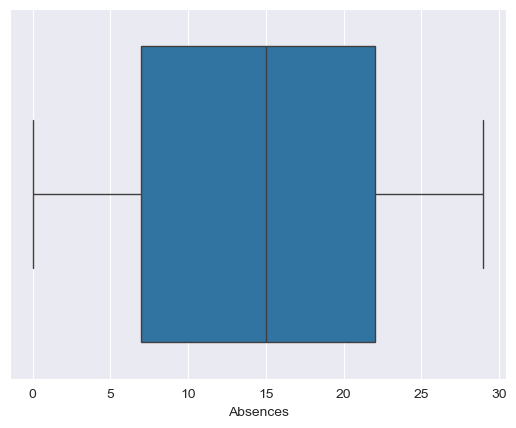

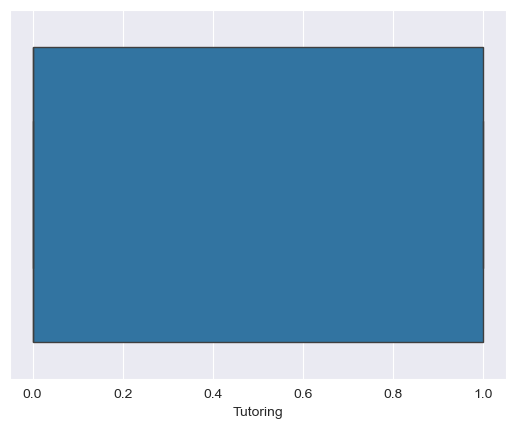

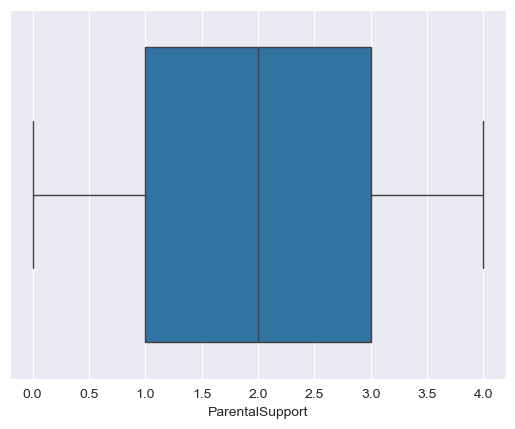

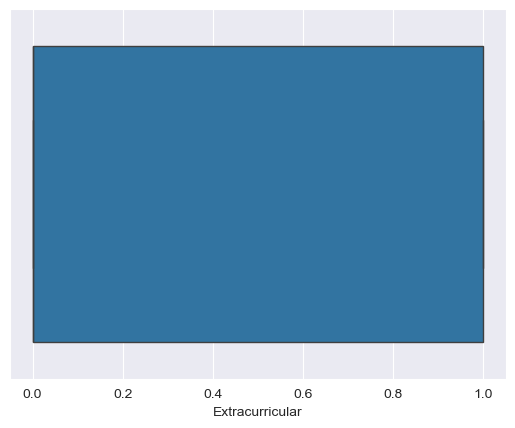

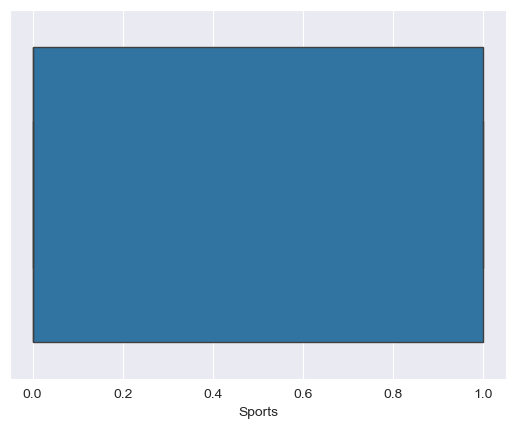

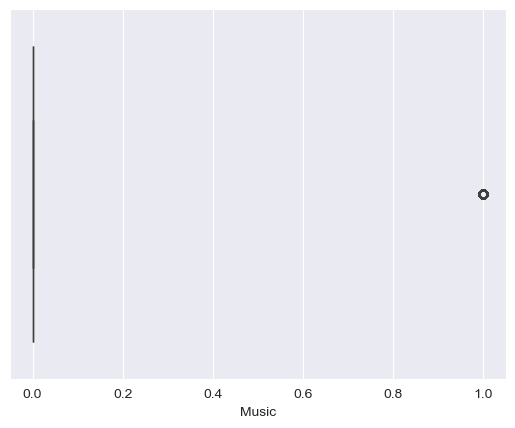

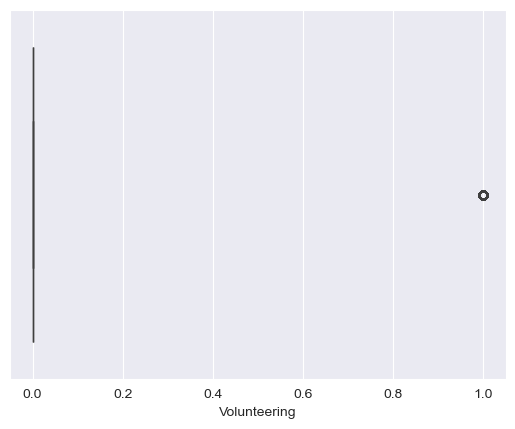

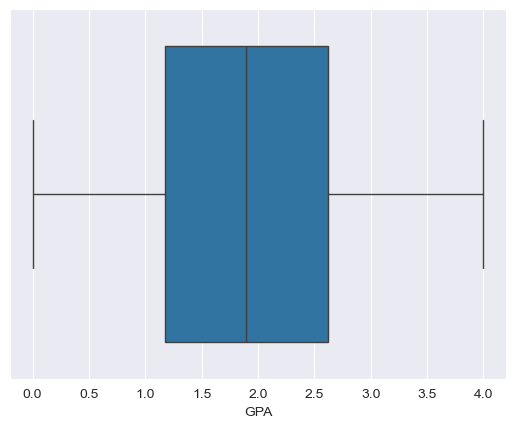

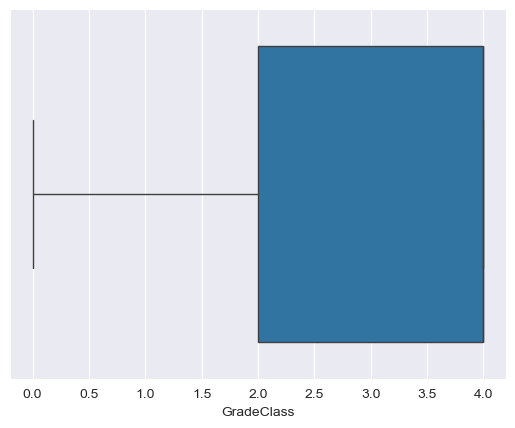

In [7]:
for col in df.columns:
   sns.boxplot(data = df, x=col)
   plt.show()

In [8]:
print(df.isnull().sum())  # Shows count of missing values per column

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [9]:
print(df.isnull().mean() * 100)  # Shows percentage of missing values per column

StudentID            0.0
Age                  0.0
Gender               0.0
Ethnicity            0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64


In [10]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [11]:
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
642,1643,18,1,0,4,18.118879,24,1,0,1,1,0,0,1.396278
1752,2753,16,1,3,2,2.469271,19,0,1,0,0,0,1,0.754751
1401,2402,17,0,2,3,3.456401,25,0,0,0,0,0,0,0.136166
2032,3033,17,1,0,1,15.838131,25,1,2,0,0,0,0,1.172192
990,1991,16,0,0,0,1.045373,19,1,2,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2639,15,0,1,0,13.092424,13,1,1,0,0,0,0,1.595627
1095,2096,16,0,0,2,2.159249,19,0,4,0,1,0,0,1.523945
1130,2131,16,1,0,2,3.572578,14,1,2,1,1,0,0,2.051919
1294,2295,18,0,3,2,4.402585,20,0,3,0,0,0,0,1.348997


In [14]:
X_test

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
1004,2005,15,1,2,4,0.135763,17,0,2,0,1,1,1,1.427724
196,1197,16,1,0,4,1.989925,0,0,1,1,0,0,1,3.117354
2342,3343,15,0,0,0,10.588715,15,0,3,0,0,0,1,2.037769
1708,2709,18,1,1,2,16.208658,1,0,3,1,0,0,0,3.548521
435,1436,18,0,0,0,3.576821,27,0,1,0,1,0,0,0.248977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1987,18,1,0,2,8.412605,16,0,3,0,1,0,0,1.562360
120,1121,18,1,0,3,3.170405,12,1,1,1,1,0,0,2.174903
283,1284,17,0,0,1,5.141922,5,1,1,0,0,0,0,2.332540
1740,2741,18,1,1,0,10.281614,10,0,3,1,0,0,0,2.777967


In [15]:
y_train

642     4.0
1752    4.0
1401    4.0
2032    4.0
990     4.0
       ... 
1638    4.0
1095    4.0
1130    3.0
1294    4.0
860     4.0
Name: GradeClass, Length: 1913, dtype: float64

In [16]:
y_test

1004    4.0
196     1.0
2342    2.0
1708    0.0
435     4.0
       ... 
986     4.0
120     3.0
283     3.0
1740    2.0
1726    4.0
Name: GradeClass, Length: 479, dtype: float64

In [17]:
df['GradeClass'].dtype


dtype('float64')

In [18]:

num_pipe = Pipeline([
    ('pt', PowerTransformer())
])
dtc = Pipeline([
    ('num', num_pipe),
    ('dtc', OneVsRestClassifier(DecisionTreeClassifier()))
])
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)





num_pipe = Pipeline([
    ('pt', PowerTransformer())
])
rfc = Pipeline([
    ('num', num_pipe),
    ('dtc', OneVsRestClassifier(RandomForestClassifier()))
])
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)




num_pipe = Pipeline([
    ('pt', PowerTransformer())
])
xgb = Pipeline([
    ('num', num_pipe),
    ('dtc', OneVsRestClassifier(XGBClassifier()))
])
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)




num_pipe = Pipeline([
    ('pt', PowerTransformer())
])
lr = Pipeline([
    ('num', num_pipe),
    ('dtc', OneVsRestClassifier(LogisticRegression()))
])
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)



In [19]:
pred_proba_rfc = rfc.predict_proba(X_test)
pred_proba_dtc = dtc.predict_proba(X_test)
pred_proba_xgb = xgb.predict_proba(X_test)
pred_proba_lr = lr.predict_proba(X_test)

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\multiclass.py:503: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [20]:
pred_dtc
    

array([4., 1., 0., 0., 4., 2., 3., 3., 3., 4., 4., 4., 2., 4., 2., 4., 4.,
       4., 3., 3., 4., 4., 4., 1., 4., 4., 4., 1., 3., 3., 3., 4., 2., 1.,
       4., 4., 1., 4., 1., 4., 4., 0., 4., 3., 4., 3., 2., 4., 2., 4., 1.,
       1., 4., 4., 1., 1., 3., 1., 4., 3., 1., 3., 3., 4., 4., 4., 3., 3.,
       4., 1., 0., 4., 2., 2., 4., 2., 3., 4., 4., 4., 3., 4., 3., 4., 4.,
       4., 0., 4., 3., 4., 2., 4., 4., 4., 1., 4., 1., 4., 4., 4., 4., 3.,
       4., 3., 4., 3., 2., 4., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4.,
       3., 4., 1., 0., 4., 4., 4., 2., 4., 3., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 1., 4., 2., 4., 4., 2., 4., 4., 1., 4., 0.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.,
       4., 1., 4., 4., 4., 2., 3., 4., 3., 4., 2., 4., 4., 2., 2., 2., 1.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 3., 4., 1., 2., 3.,
       2., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 0., 4., 4., 4.

In [21]:
dtc_acc = accuracy_score(y_test, pred_dtc)

In [22]:
pred_rfc

array([4., 1., 3., 0., 4., 2., 3., 3., 3., 4., 3., 4., 2., 3., 2., 4., 4.,
       4., 3., 3., 4., 4., 4., 1., 4., 4., 4., 1., 3., 3., 3., 4., 2., 1.,
       4., 4., 1., 2., 1., 4., 2., 0., 4., 3., 4., 3., 2., 4., 2., 4., 1.,
       1., 4., 4., 4., 1., 3., 1., 4., 3., 4., 3., 3., 4., 4., 4., 1., 3.,
       4., 1., 0., 4., 2., 2., 4., 2., 3., 4., 4., 4., 3., 1., 3., 4., 4.,
       4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 3., 0., 4., 4., 4., 3., 2., 4.,
       3., 4., 1., 0., 4., 4., 4., 2., 4., 3., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 1., 4., 2., 4., 4., 2., 1., 4., 1., 4., 0.,
       4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.,
       4., 1., 1., 4., 4., 2., 3., 4., 3., 4., 2., 4., 4., 2., 2., 2., 1.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 3., 4., 1., 4., 3.,
       2., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 0., 4., 4., 4.

In [23]:
rfc_acc = accuracy_score(y_test, pred_rfc)

In [24]:
pred_lr

array([4., 2., 4., 1., 4., 3., 4., 4., 4., 4., 1., 4., 1., 1., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 2., 4., 3., 4., 4., 3., 2.,
       4., 4., 2., 2., 2., 4., 2., 1., 4., 4., 4., 2., 0., 4., 1., 4., 2.,
       2., 4., 4., 4., 2., 3., 1., 4., 4., 4., 4., 3., 4., 4., 4., 1., 2.,
       4., 2., 1., 4., 1., 2., 4., 2., 4., 4., 4., 4., 4., 1., 3., 4., 4.,
       4., 1., 4., 4., 4., 3., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 2., 4., 4., 4., 4., 2., 1., 4., 4., 4., 4., 2., 4.,
       3., 4., 1., 1., 4., 4., 4., 3., 4., 4., 2., 4., 1., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 2., 4., 2., 4., 4., 3., 1., 4., 0., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 1.,
       4., 1., 2., 4., 4., 1., 2., 4., 4., 4., 2., 4., 4., 1., 2., 3., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 2., 4., 1., 4., 2.,
       3., 3., 4., 2., 4., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 1., 4., 4., 4.

In [25]:
lr_acc = accuracy_score(y_test, pred_lr)

In [26]:
pd.DataFrame(pred_proba_dtc).values

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [27]:
def plot_roc_curve(y_train, y_test, pred_proba , model_name):
    pred_proba = pd.DataFrame(pred_proba).fillna(0).values
    fpr = dict() #now a roc for dtc
    tpr = dict()
    roc_auc = dict()
    n_classes = y_train.nunique()
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), pred_proba.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    mean_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(mean_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
    
    mean_tpr /= n_classes
    roc_auc_macro = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, linestyle='-.', label=f'{model_name} (AUC = {roc_auc_macro:.4f})')

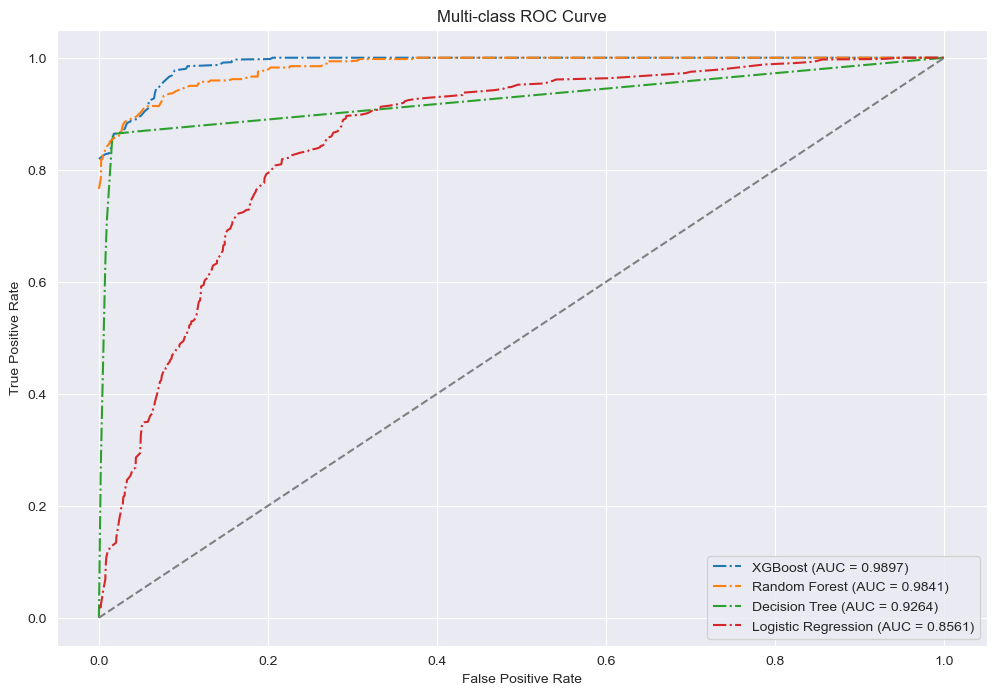

In [28]:
plt.figure(figsize=(12, 8))
plot_roc_curve(y_train, y_test, pred_proba_xgb, 'XGBoost')
plot_roc_curve(y_train, y_test, pred_proba_rfc, 'Random Forest')
plot_roc_curve(y_train, y_test, pred_proba_dtc, 'Decision Tree')
plot_roc_curve(y_train, y_test, pred_proba_lr, 'Logistic Regression')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend()
plt.show()

In [29]:
#precision recall curve for all models


In [31]:
def plot_precision_recall_curve(y_train, y_test, pred_proba, model_name):
    pred_proba = pd.DataFrame(pred_proba).fillna(0).values
    precision = dict()
    recall = dict()
    average_precision = dict()
    n_classes = y_train.nunique()
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], pred_proba[:, i])
    precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), pred_proba.ravel())
    average_precision_micro = average_precision_score(y_test_bin, pred_proba, average='micro')
    plt.plot(recall_micro, precision_micro, linestyle='-.', label=f'{model_name} (AUC = {average_precision_micro:.3f})')
    

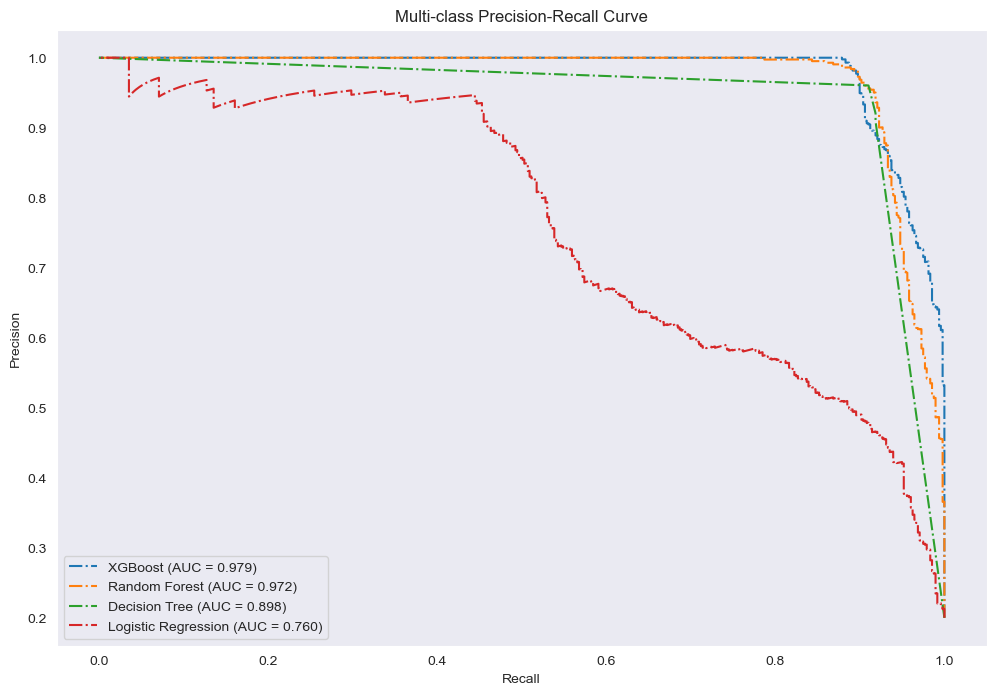

In [32]:
plt.figure(figsize=(12, 8))
plot_precision_recall_curve(y_train, y_test, pred_proba_xgb, 'XGBoost')
plot_precision_recall_curve(y_train, y_test, pred_proba_rfc, 'Random Forest')
plot_precision_recall_curve(y_train, y_test, pred_proba_dtc, 'Decision Tree')
plot_precision_recall_curve(y_train, y_test, pred_proba_lr, 'Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()





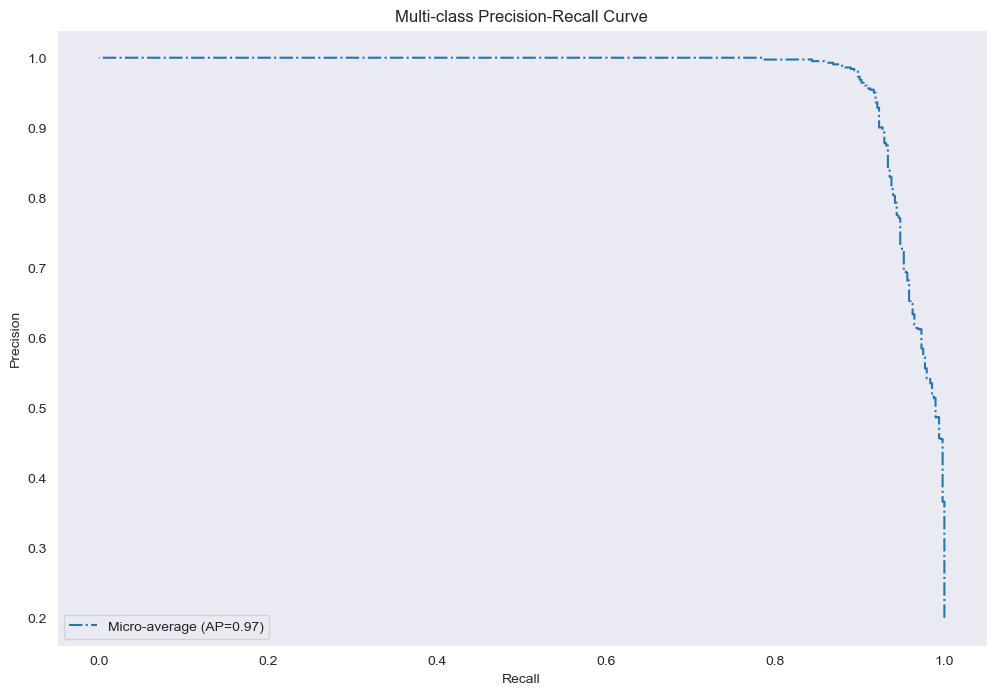

In [40]:
plt.figure(figsize=(12, 8))
#y_true = np.random.randint(0, n_classes, n_samples)
#y_scores = np.random.rand(n_samples, n_classes)
y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

n_samples = y_test.shape[0]
n_classes = 5


precision = dict()
recall = dict()
average_precision = dict()


for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], pred_proba_rfc[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], pred_proba_rfc[:, i])
    #plt.plot(recall[i], precision[i], label=f'Class {i} (AP={average_precision[i]:.2f})')
    
precision_micro, recall_micro, _ = precision_recall_curve(y_true_bin.ravel(), pred_proba_rfc.ravel()) #micro average
average_precision_micro = average_precision_score(y_true_bin, pred_proba_rfc, average='micro')
plt.plot(recall_micro, precision_micro, linestyle='-.', label=f'Micro-average (AP={average_precision_micro:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

    
    

In [41]:
y_true_bin

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])

In [42]:
list(y_true_bin.ravel())

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [43]:
pred_xgb

array([4., 1., 0., 0., 4., 2., 3., 3., 3., 4., 4., 4., 2., 3., 2., 4., 4.,
       4., 3., 3., 4., 4., 4., 1., 4., 4., 4., 1., 3., 3., 3., 4., 2., 1.,
       4., 4., 1., 3., 1., 4., 2., 0., 4., 3., 4., 3., 2., 4., 2., 4., 1.,
       1., 4., 4., 1., 1., 3., 1., 4., 3., 4., 3., 3., 4., 4., 4., 1., 3.,
       4., 1., 0., 4., 2., 2., 4., 2., 3., 4., 4., 4., 3., 1., 3., 4., 4.,
       4., 0., 4., 3., 4., 2., 4., 4., 4., 1., 4., 1., 4., 4., 4., 4., 3.,
       4., 3., 4., 3., 2., 4., 4., 4., 4., 3., 0., 4., 4., 4., 3., 1., 4.,
       3., 4., 1., 0., 4., 4., 4., 2., 4., 3., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 2., 4., 1., 4., 2., 4., 4., 2., 1., 4., 1., 4., 1.,
       4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.,
       4., 1., 1., 4., 4., 2., 3., 4., 3., 4., 2., 4., 4., 2., 2., 2., 1.,
       1., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 3., 4., 1., 2., 3.,
       2., 3., 4., 2., 3., 4., 4., 4., 4., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 0., 4., 4., 4.

In [44]:
xgb_acc = accuracy_score(y_test, pred_xgb)

In [45]:
df['GradeClass'].value_counts(normalize = True)

GradeClass
4.0    0.506271
3.0    0.173077
2.0    0.163462
1.0    0.112458
0.0    0.044732
Name: proportion, dtype: float64

In [46]:
df['GradeClass'].value_counts() #seeing the distribution of the target variable if its balanced or not

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [47]:
print(f'DTC Accuracy: {dtc_acc:.3f}')
print(f'RFC Accuracy: {rfc_acc:.3f}')
print(f'LR Accuracy: {lr_acc:.3f}')
print(f'XGB Accuracy: {xgb_acc:.3f}')

DTC Accuracy: 0.914
RFC Accuracy: 0.923
LR Accuracy: 0.635
XGB Accuracy: 0.908


In [48]:
dtc_report = classification_report(y_test, pred_dtc)
print(dtc_report)

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76        22
         1.0       0.90      0.88      0.89        49
         2.0       0.91      0.86      0.88        85
         3.0       0.92      0.91      0.91        86
         4.0       0.92      0.97      0.94       237

    accuracy                           0.91       479
   macro avg       0.92      0.85      0.88       479
weighted avg       0.91      0.91      0.91       479



In [49]:
rfc_report = classification_report(y_test, pred_rfc)
print(rfc_report)

              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        22
         1.0       0.88      0.88      0.88        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.95      0.99      0.97       237

    accuracy                           0.92       479
   macro avg       0.89      0.85      0.87       479
weighted avg       0.92      0.92      0.92       479



In [50]:
xgb_report = classification_report(y_test, pred_xgb)
print(xgb_report)

              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62        22
         1.0       0.77      0.88      0.82        49
         2.0       0.91      0.86      0.88        85
         3.0       0.89      0.90      0.89        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.91       479
   macro avg       0.84      0.84      0.84       479
weighted avg       0.91      0.91      0.91       479



In [51]:
lr_report = classification_report(y_test, pred_lr)
print(lr_report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.27      0.24      0.26        49
         2.0       0.45      0.52      0.48        85
         3.0       0.34      0.15      0.21        86
         4.0       0.80      0.99      0.88       237

    accuracy                           0.63       479
   macro avg       0.37      0.38      0.37       479
weighted avg       0.56      0.63      0.59       479



In [52]:
# Check for NaN values in y_probs
if np.any(np.isnan(y_probs_rfc)):
    print("NaN values found in y_probs_rfc!")
else:
    print("No NaN values in y_probs_rfc.")

NameError: name 'y_probs_rfc' is not defined

In [59]:
# Replace NaN values with 0 (or any other value you choose)
y_probs_rfc = np.nan_to_num(pred_proba_rfc, nan=0.0)


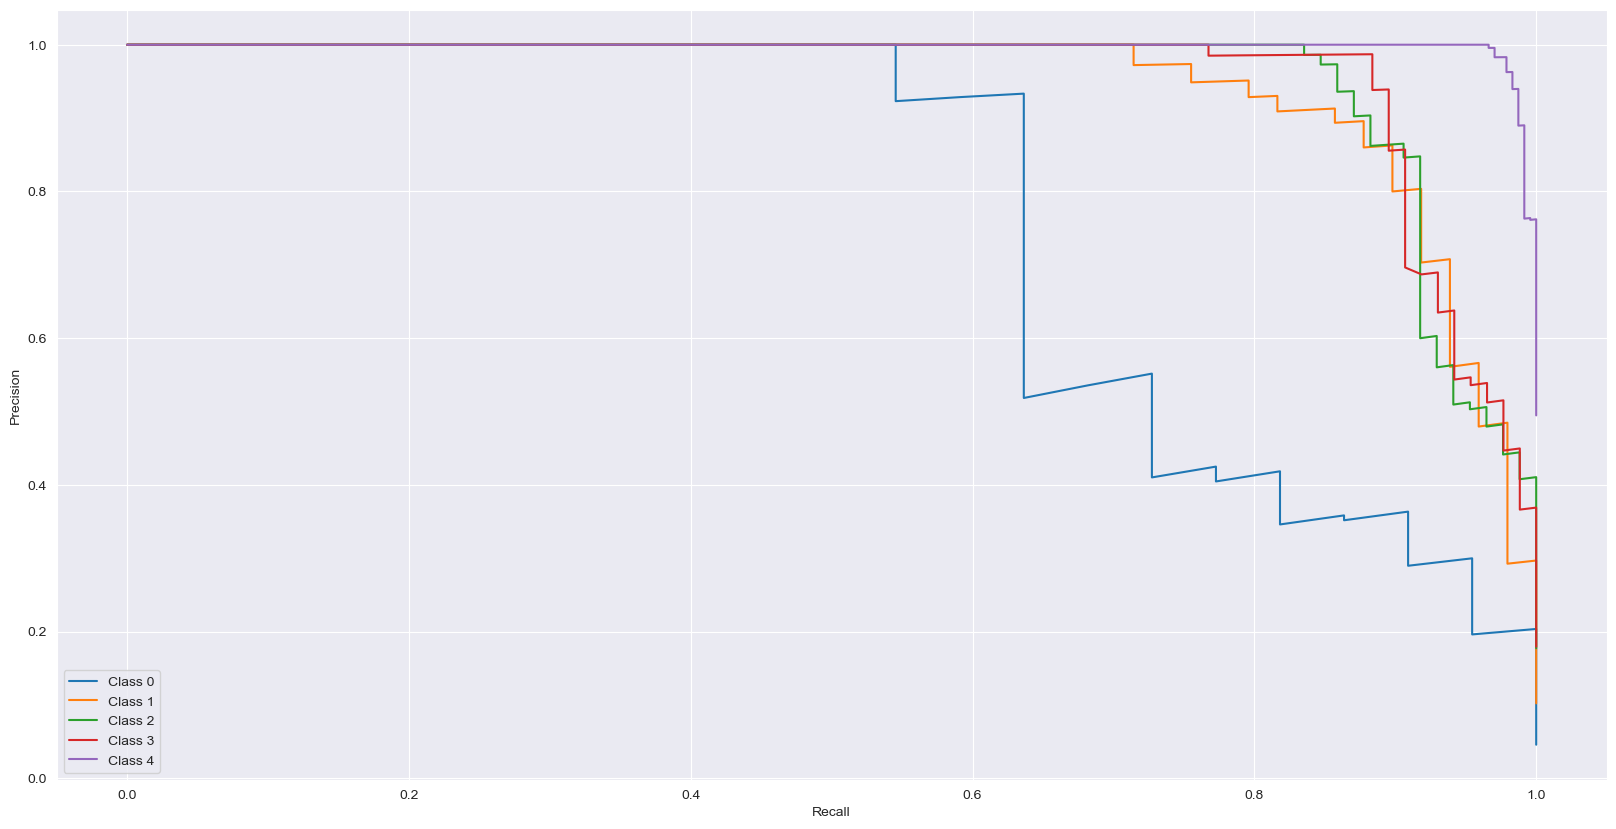

In [61]:
#PRECISION-RECALL curve FOR RANDOM FOREST
plt.figure(figsize=(20, 10))
for i in range(pred_proba_rfc.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs_rfc[:,i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

    

In [62]:
#how to draw the no skill line

In [63]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])



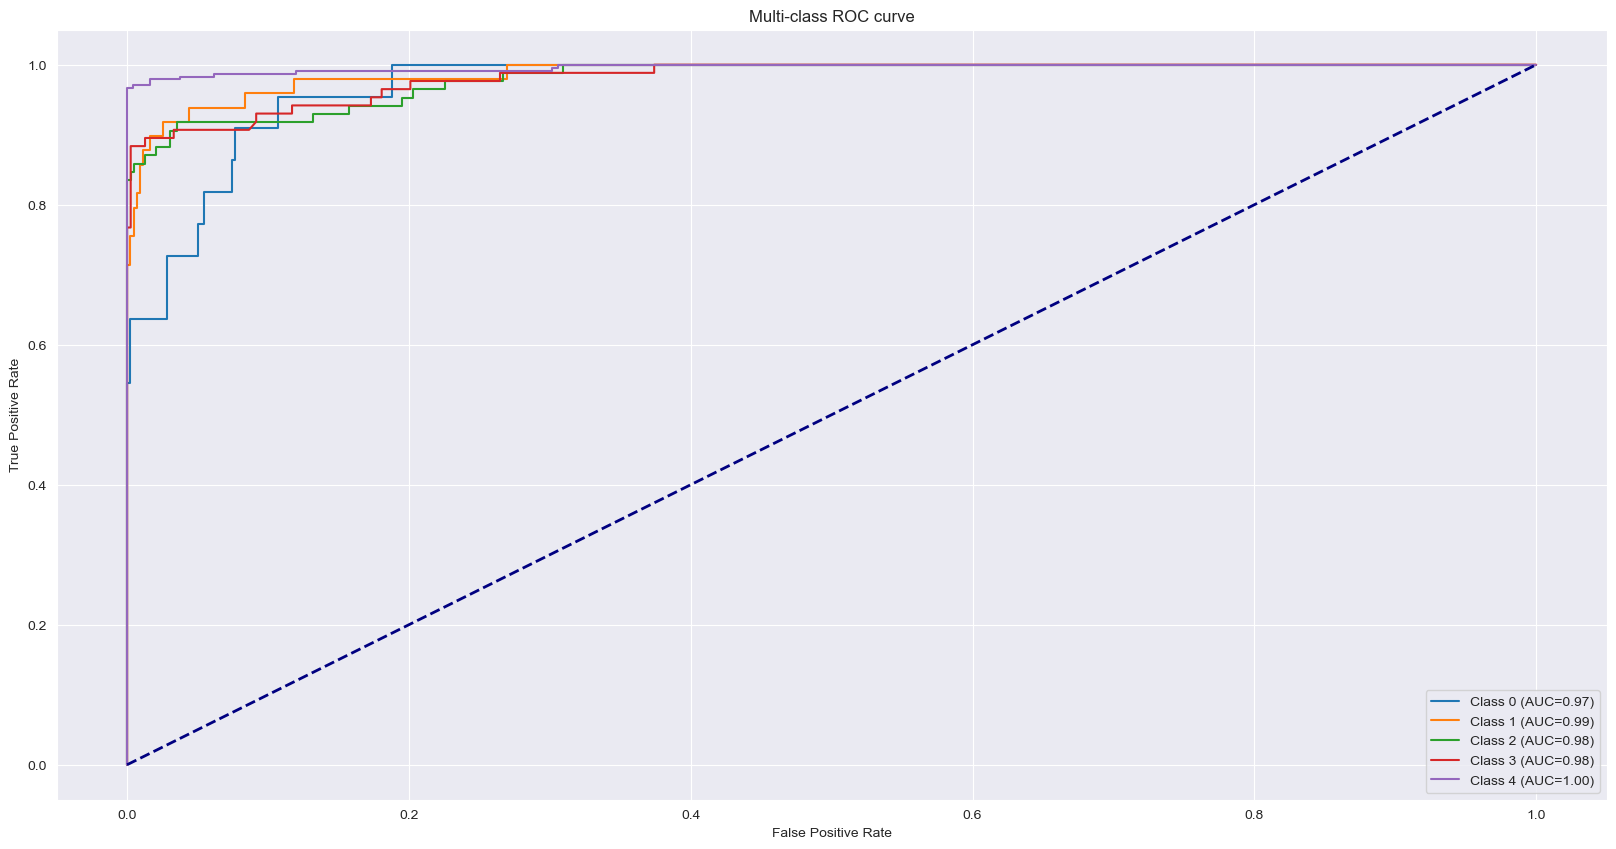

In [64]:
#ROC curve FOR RANDOM FOREST
plt.figure(figsize=(20, 10))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_rfc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})') #plotting ROC curve for each class
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #ploting diginal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend()
plt.grid(True)
plt.show()



In [65]:
macro_roc_auc = roc_auc_score(y_test_bin, pred_proba_rfc, average='macro', multi_class='ovr')
print(f'Macro ROC AUC Score: {macro_roc_auc:.2f}')

Macro ROC AUC Score: 0.98


In [66]:
macro_roc_auc = roc_auc_score(y_test_bin, pred_proba_lr, average='macro', multi_class='ovr')
print(f'Macro ROC AUC Score: {macro_roc_auc:.2f}')

Macro ROC AUC Score: 0.85


In [67]:
macro_roc_auc = roc_auc_score(y_test_bin, pred_proba_xgb, average='macro', multi_class='ovr')
print(f'Macro ROC AUC Score: {macro_roc_auc:.2f}')

Macro ROC AUC Score: 0.99


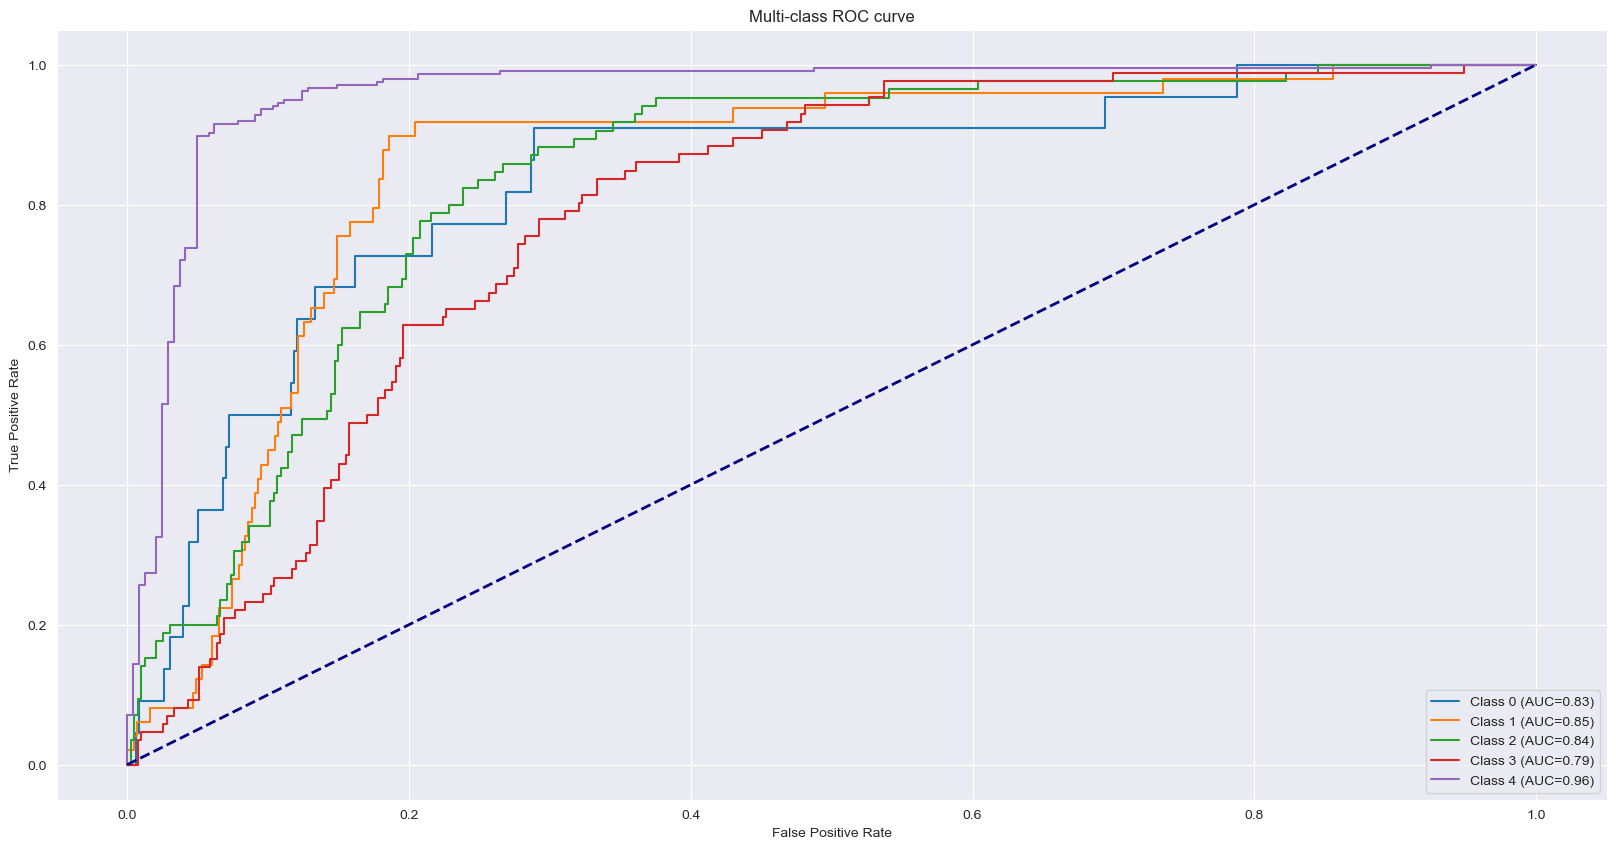

In [65]:
#ROC curve FOR LOGISTIC REGRESSION
plt.figure(figsize=(20, 10))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})') #plotting ROC curve for each class
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #ploting diginal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend()
plt.grid(True)
plt.show()

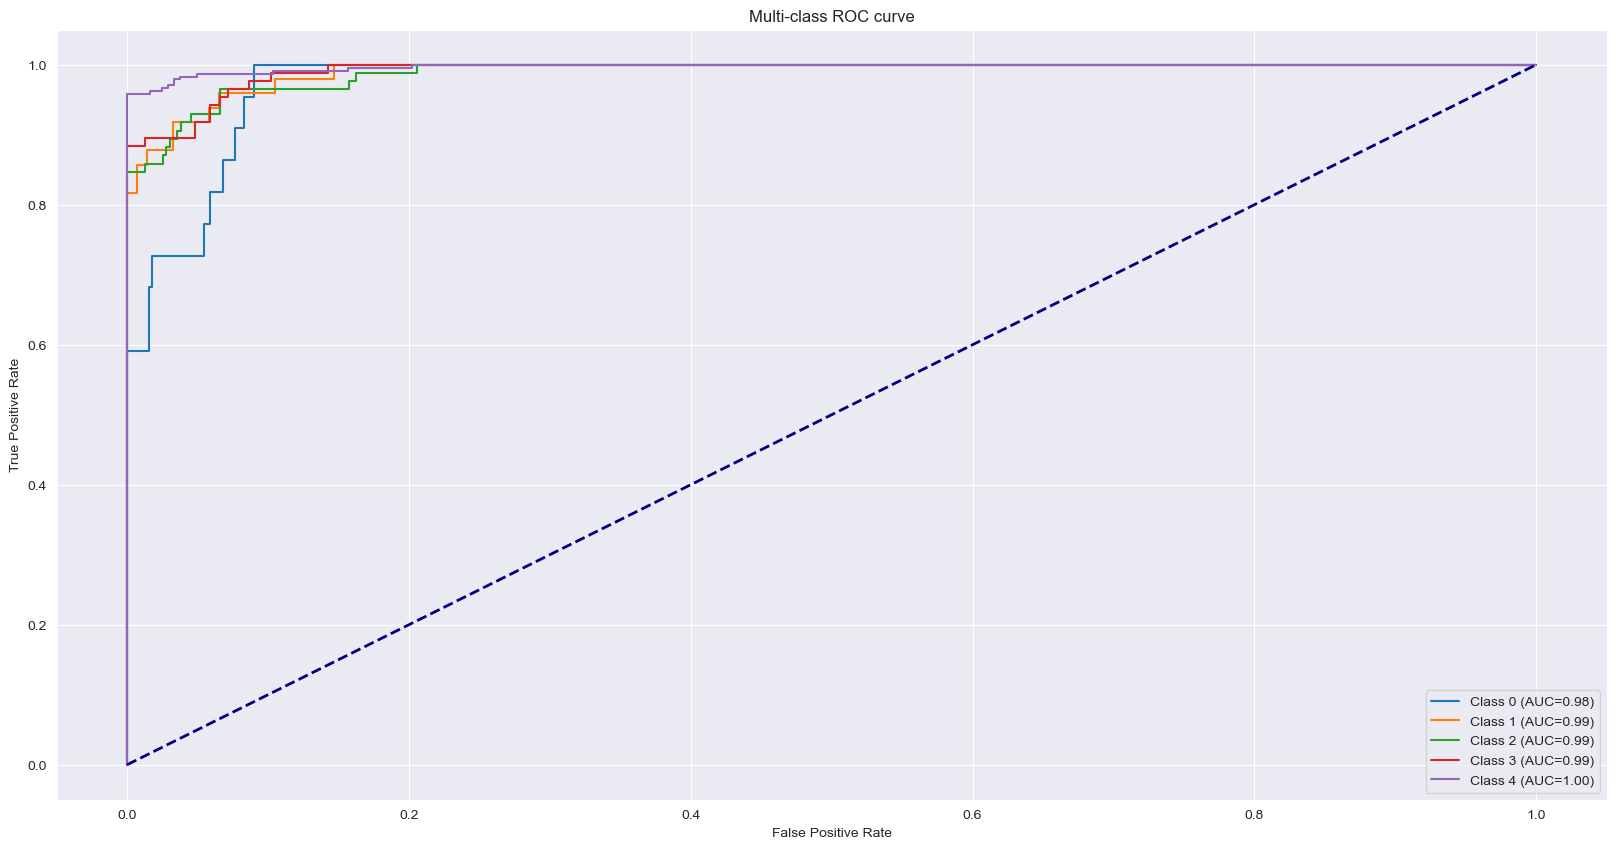

In [66]:
#ROC curve FOR XGBOOST
plt.figure(figsize=(20, 10))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})') #plotting ROC curve for each class
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #ploting diginal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend()
plt.grid(True)
plt.show()

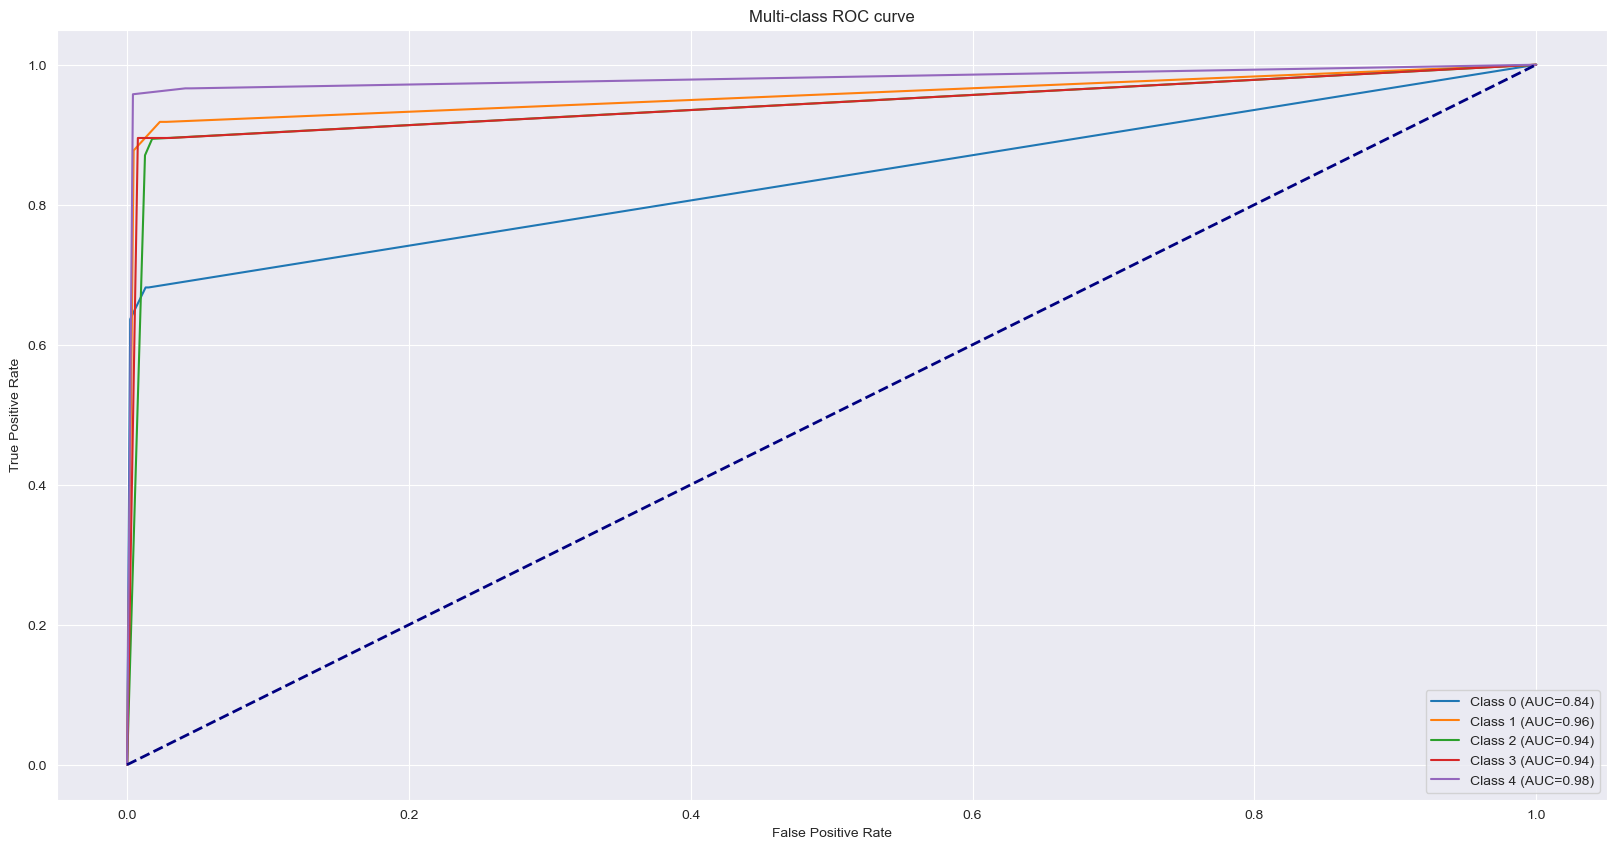

In [57]:
#ROC curve FOR DECISION TREE
plt.figure(figsize=(20, 10))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_proba_dtc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})') #plotting ROC curve for each class
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  #ploting diginal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend()
plt.grid(True)
plt.show()

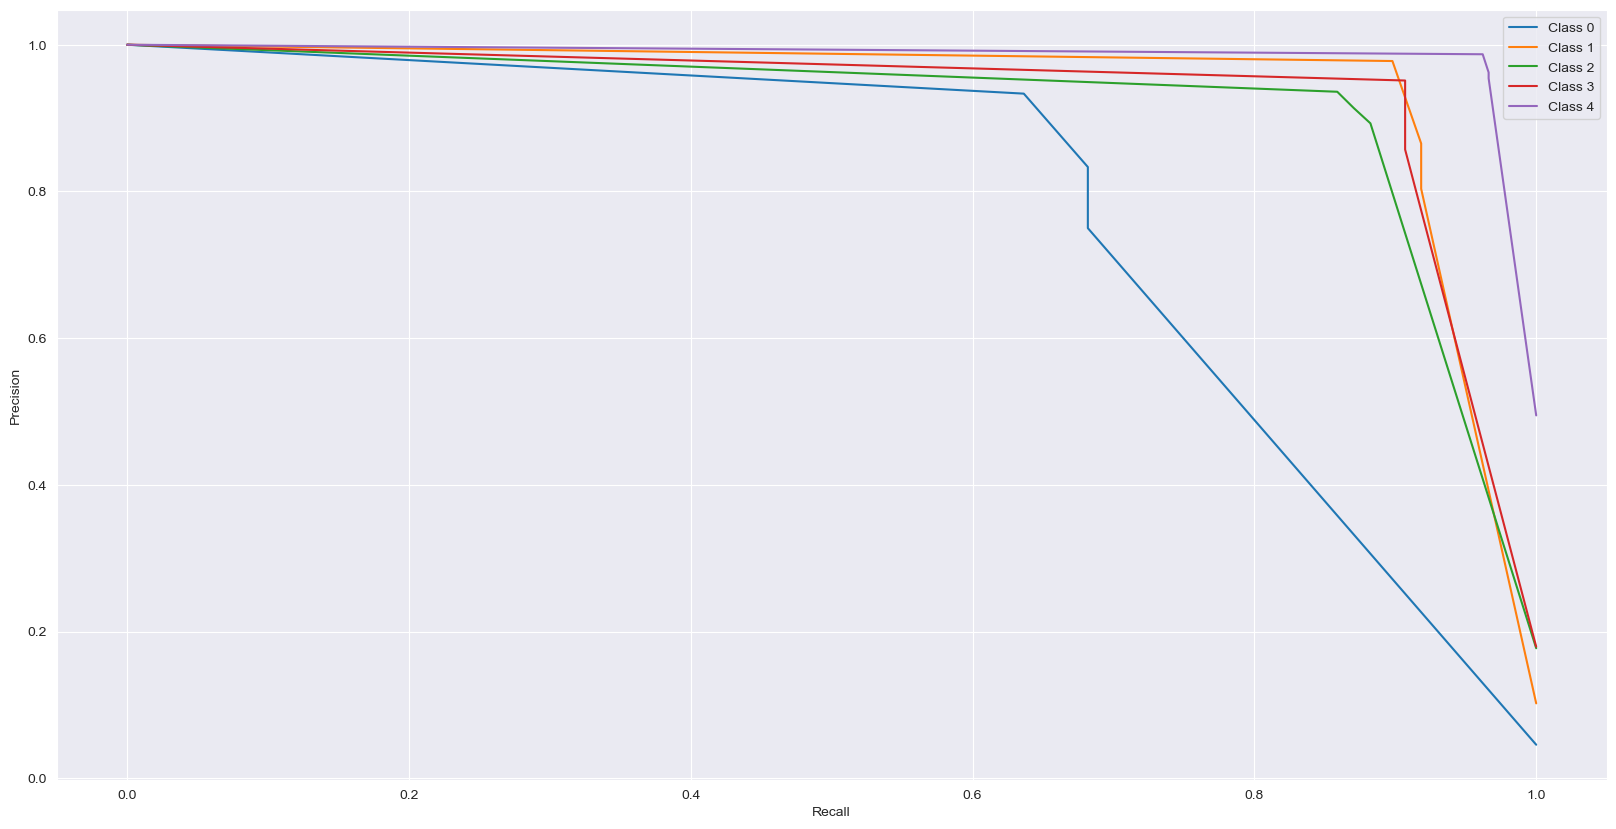

In [67]:
#PRECISION-RECALL curve FOR DECISION TREE
plt.figure(figsize=(20, 10))
for i in range(y_probs_dtc.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, pred_proba_dtc[:,i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

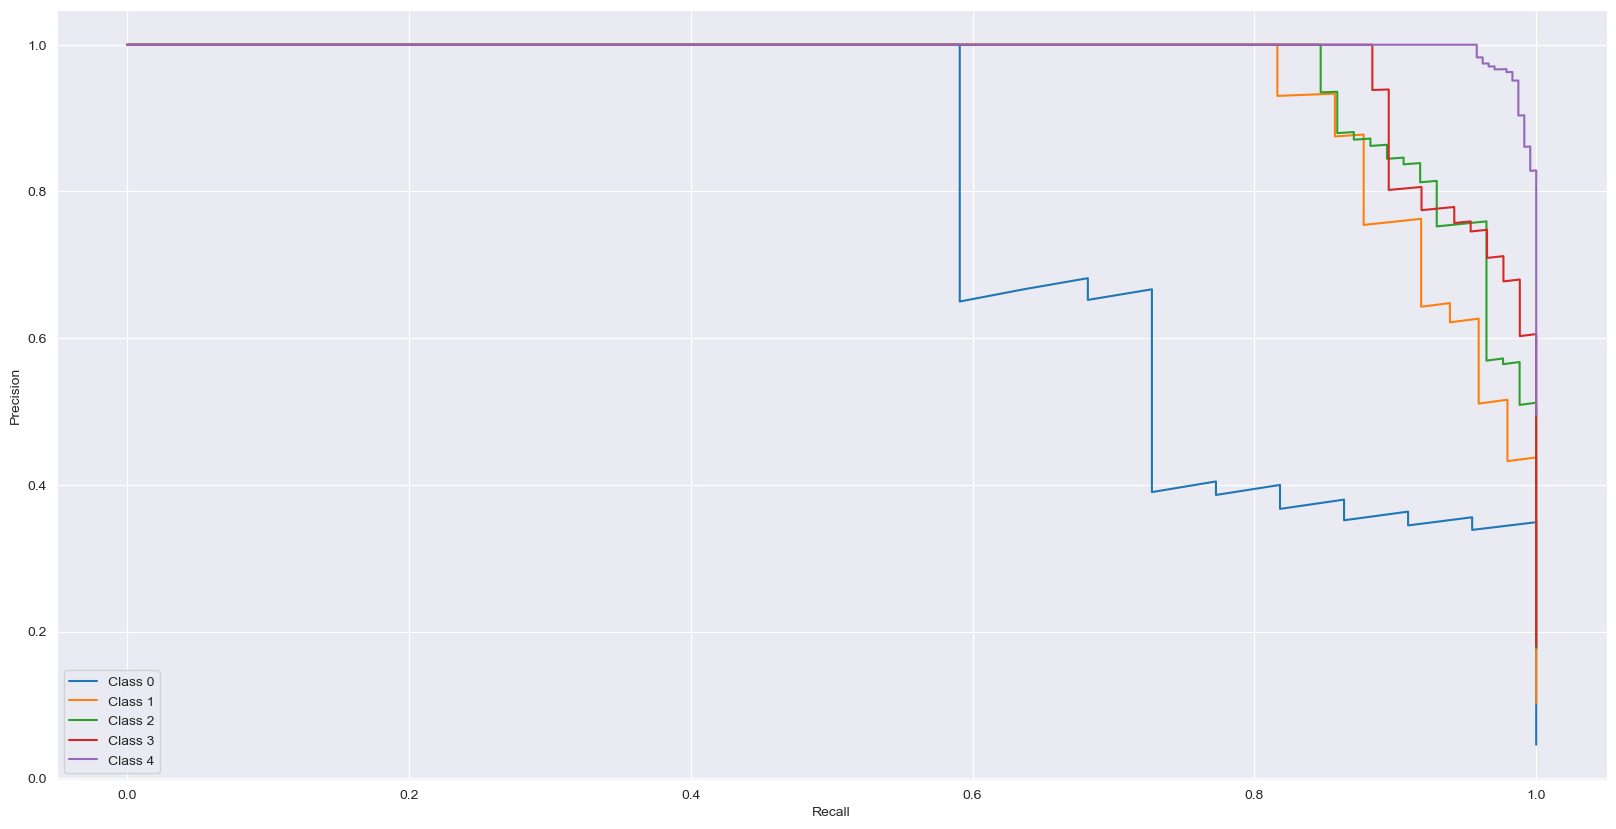

In [68]:
#PRECISION-RECALL curve FOR XGBOOST
plt.figure(figsize=(20, 10))
for i in range(pred_proba_xgb.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, pred_proba_xgb[:,i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

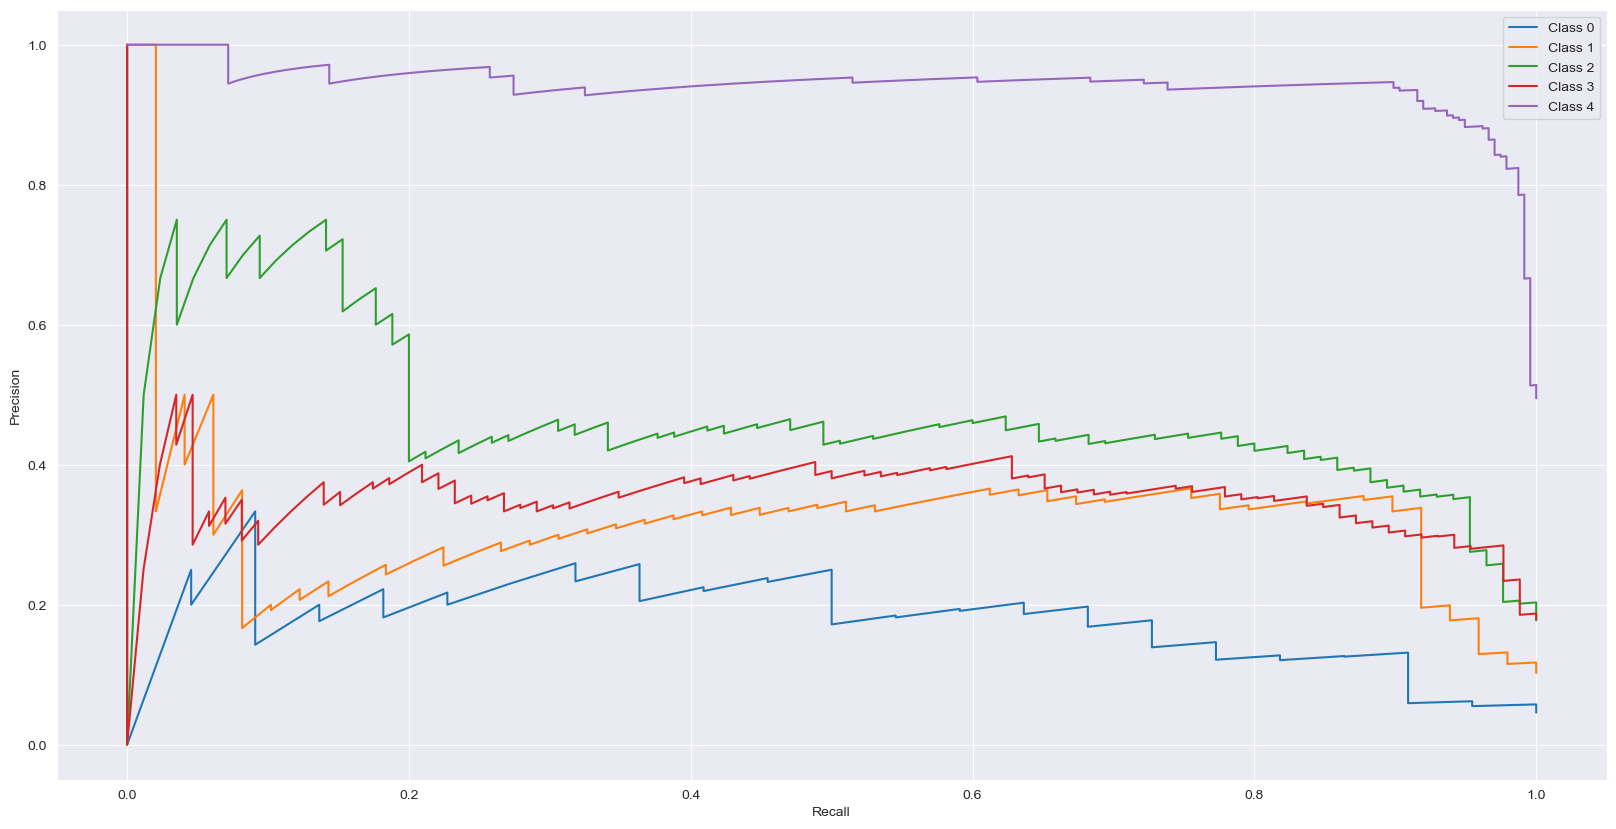

In [69]:
#PRECISION-RECALL curve FOR LOGISTIC REGRESSION
plt.figure(figsize=(20, 10))
for i in range(pred_proba_lr.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, pred_proba_lr[:,i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

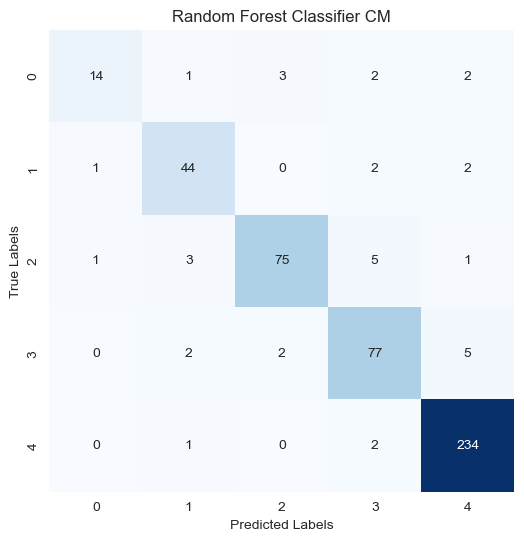

In [70]:
cm = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Classifier CM')
plt.show()


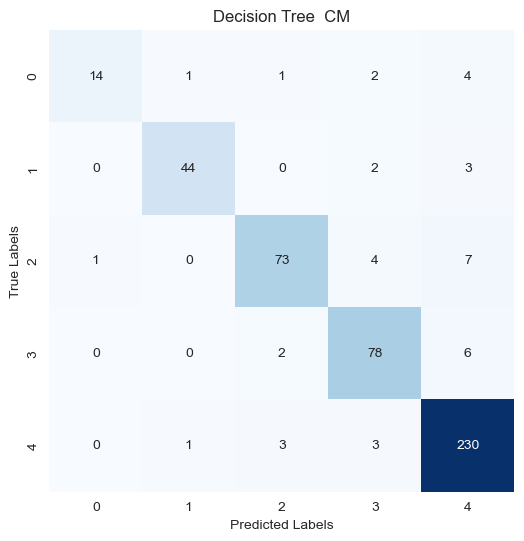

In [71]:
cm = confusion_matrix(y_test, pred_dtc)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree  CM')
plt.show()


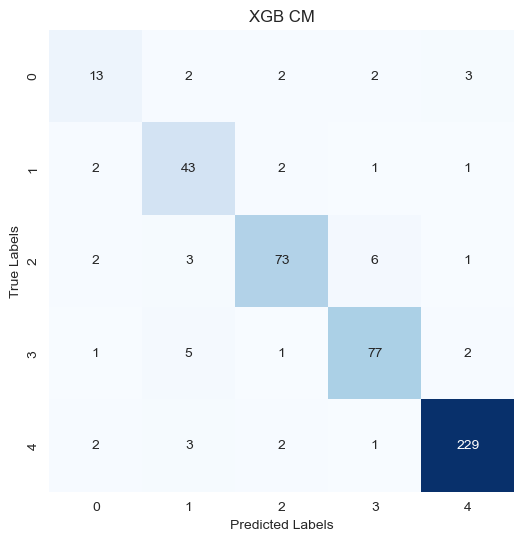

In [72]:
cm = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGB CM')
plt.show()


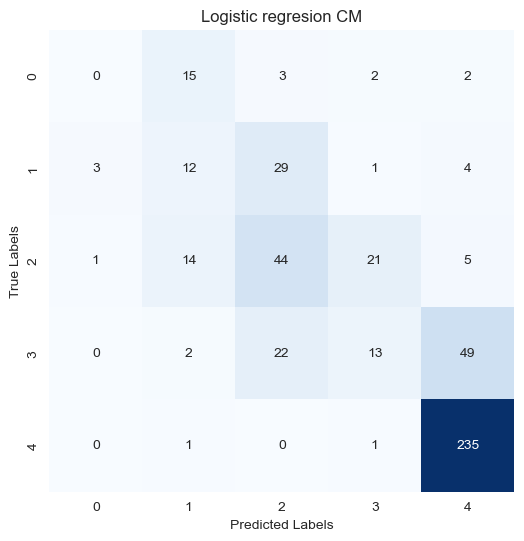

In [73]:
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic regresion CM')
plt.show()